# Data visualization

Chapter 16 of Py4E covers a few tools for data visualization, and this is a good thing to look over, but I think `matplotlib` is by far the most commonly used and robust tool for data visualization.

This notebook is heavly based on the excellent coverage of this topic in Jake VanderPlas' [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). Similar to TLCL and Py4E, that book is also available free online in several formats, including Jupyter Notebooks, and for order in print.

Here's Chapter 4 of the Python Data Science Handbook as a [notebook](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html). One of the things that Jake points out is that matplotlib is aging, but is still at the foundation of a lot of the newer modules that serve more as glossy drivers than replacements of matplot lib:

> In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.





## Getting going in Jupyter

To use matplotlib in Jupyter, you need to turn on the Jupyter magic command `%matplotlib inline` which tells Jupyter to display the plots generated in the notebook.

Check out this quick example

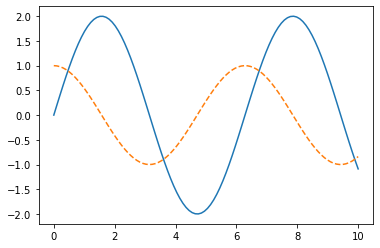

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x)*2, '-')
plt.plot(x, np.cos(x), '--');

We can also save these to a file:

In [2]:
fig.savefig('my_figure.png')

This is also a good time to show that you can execute Bash commands in Jupyter notebooks with the `!`:

In [3]:
!ls -lh my_figure.png  # Note this notebook was renderd on Windows, 
                       # so there is an error, but should run on Linux

-rw-r--r-- 1 magitz bsc4452 18K Oct 23 07:58 my_figure.png


And for publication, you never want to save graphs as PNGs (we'll return this point later in the semester), so luckily there are many format options!

In [4]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Two interfaces

One of the sometimes confusing things with matplotlib is that there are two ways of doing most things.

As the name may hint at, matplotlib was initially developed as Python replacement for Matlab. As such, there is one set of commands that mimic the Matlab syntax.

But, Python being Python, there is another set of commands that are a bit more "Pythonic" with methods and such.

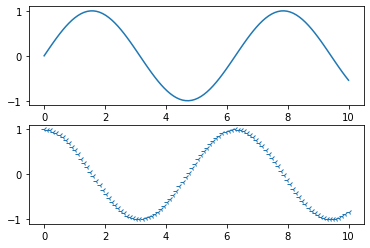

In [5]:
# Matlab-like way of making a figure

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x),"3");

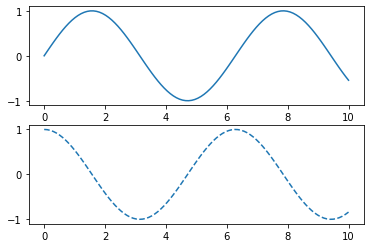

In [6]:
# Pythonic (or Object Oriented) version

# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x), linestyle='dashed');

Two methods with different sytax to get the same thing!

This makes it a challenge when searching for help. Try to recognize the two and be consistent in your use.

## So many plots...

Everything can be controlled in your plots. The chapter goes into lots of good examples of different line styles, colors and weights, symbols and more.

If you want to learn more here, definately check this out.

I want to move on to this example:

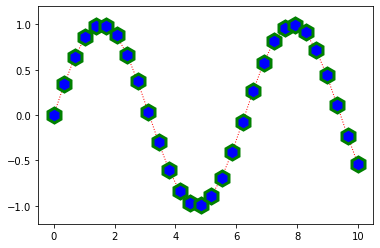

In [7]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, ':h', color='red',
         markersize=15, linewidth=1,
         markerfacecolor='blue',
         markeredgecolor='green',
         markeredgewidth=3)
plt.ylim(-1.2, 1.2);

## Scatter

While we can make scatter plots as above, check out the cool things you can do with the scatter() method

/apps/jupyterhub/1.1.0/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


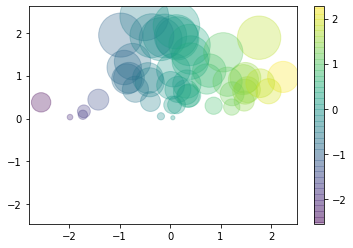

In [8]:
rng = np.random.RandomState(0) # Create some random data
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=x, s=y*1000, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

An example from plants!

In [13]:
import pandas as pd

df=pd.read_csv('/blue/bsc4452/share/Class_Files/data/Iris/Iris.data.txt', sep="\t")
df.head()

,species,soil,water,fans,width,thick,leaf.length,curve,w.start,w.end,flower,relative.rhizome.growth,relative.fitness
0,I.mariae,rendzina,100,-1.424309,-1.441833,-0.234975,-1.290788,0.205267,7.7,8.1,0,1.051948,0.451596
1,I.petrana,loess,100,0.021231,0.116421,-1.404994,-0.116140,-0.347824,14.3,13.6,1,0.951049,0.408280
2,I.petrana,rendzina,100,0.021231,-0.506880,0.155031,0.286286,0.485024,12.3,21.2,0,1.723577,0.739922
3,I.mariae,rendzina,100,1.466770,-1.441833,-0.234975,-0.757846,0.791927,13.5,20.6,0,1.525926,0.655072
4,I.atropurpurea,rendzina,100,-0.942462,-1.441833,-1.209991,0.623454,-0.416475,11.6,13.2,0,1.137931,0.488508


Text(0, 0.5, 'Leaf width')

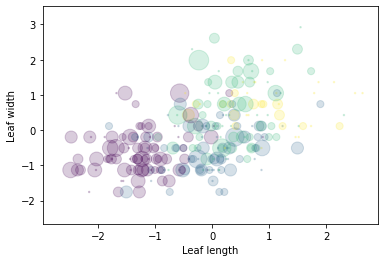

In [18]:
colors = {'I.mariae':1, 'I.petrana':2, 
          'I.atropurpurea':3, 'I.atrofusca':4}

plt.scatter(df['leaf.length'], df['width'], alpha=0.2,
            s=100*df['fans'], c=df['species'].apply(lambda x: colors[x]), cmap='viridis')
plt.xlabel('Leaf length')
plt.ylabel('Leaf width')

In this example the x and y position of points is based on leaf length and width. The size is determined by the number of leaf fans (present) and the color is based on species. So in one plot, we can see four different variables.

## 3 Dimensional plots

I'm skipping [section 4.03](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html), wich covers error bars...certainly check that out, but fairly straight forward.

[Section 4.04](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) gets into 3D plots, with density and contour plots.

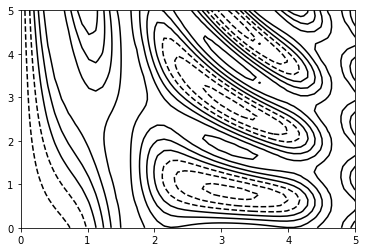

In [11]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black');

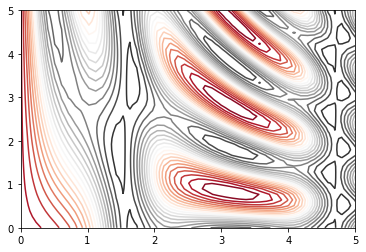

In [12]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

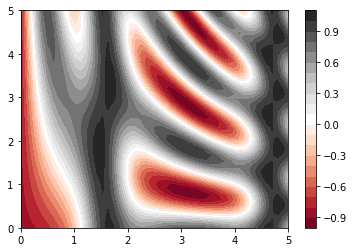

In [13]:
# Or use countourf to fill in the gaps:
plt.contourf(X, Y, Z, 20, cmap='RdGy');
plt.colorbar(); # Add a colorbar

## Histograms

This can't be much easier!

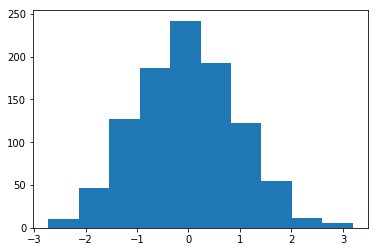

In [14]:
data = np.random.randn(1000)
plt.hist(data);

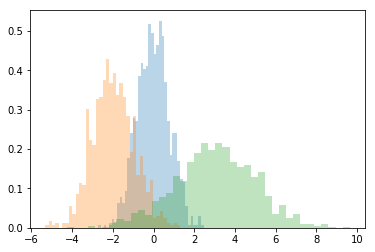

In [15]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Customizing plots:

Again, I'm skipping stuff, but I wanted to show this example as it shows so many things that can be customized. This is from [section 4.06](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html):

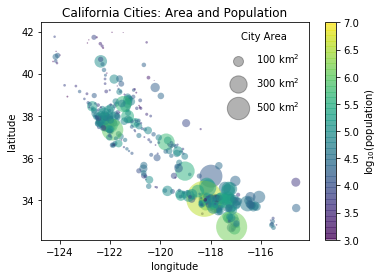

In [18]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');